# **1. Tensorflow/Keras 버전**

## **1.1 패키지 포함**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


## **1.2 데이터셋 로드 및 전처리**

- MNIST 데이터셋 로드: 손글씨 숫자 이미지와 레이블 (0-9)

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### 1.2.1 이미지 전처리

- 픽셀 값을 0-255 범위에서 0-1 범위로 정규화

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

- CNN 모델은 입력 이미지에 채널(색상) 차원을 기대함
    - MNIST 이미지는 흑백이므로 (28, 28) -> (28, 28, 1)로 변경 (마지막 1은 채널 수)

In [5]:
train_images = train_images[..., np.newaxis].astype(np.float32)
test_images = test_images[..., np.newaxis].astype(np.float32)

print(f"학습 이미지 형태: {train_images.shape}, 학습 레이블 형태: {train_labels.shape}")
print(f"테스트 이미지 형태: {test_images.shape}, 테스트 레이블 형태: {test_labels.shape}")

학습 이미지 형태: (60000, 28, 28, 1), 학습 레이블 형태: (60000,)
테스트 이미지 형태: (10000, 28, 28, 1), 테스트 레이블 형태: (10000,)


### 1.2.2 데이터셋 시각화

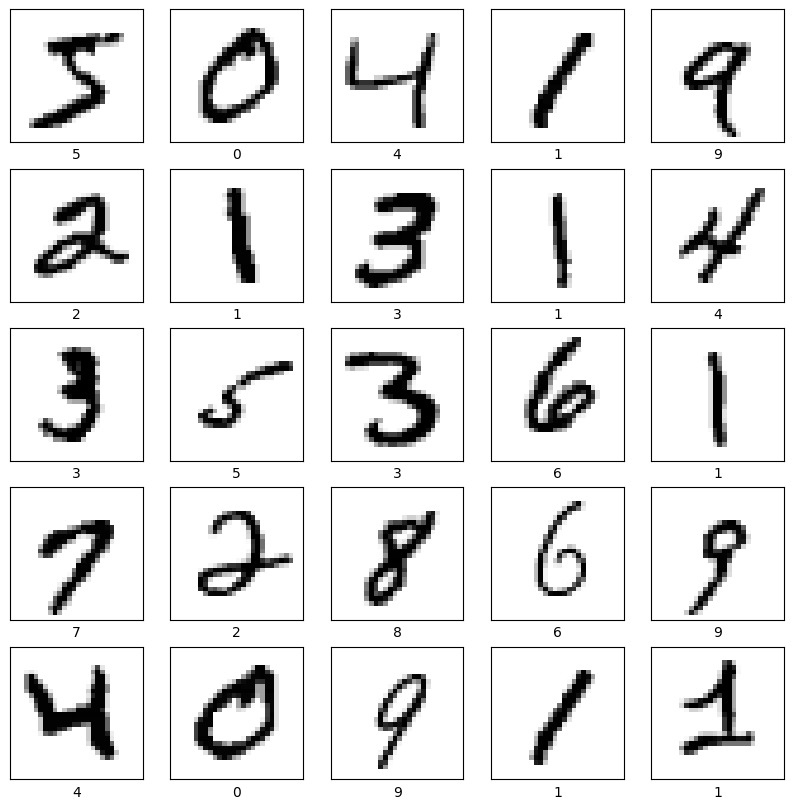

In [6]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## **1.3 CNN 모델 구축**

- Keras Functional API 사용

In [7]:
def build_cnn_model_tf():
    # 입력 계층: 28x28 픽셀, 1 채널 (흑백) 이미지
    input_shape = (28, 28, 1)

    # Keras Sequential API로 모델 정의 (간단한 모델 정의)
    model = models.Sequential([
        # 컨볼루션 계층 1
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)), # 풀링 계층 1

        # 컨볼루션 계층 2
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)), # 풀링 계층 2

        # 컨볼루션 계층 3
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

        # 특징 맵을 1차원 벡터로 평탄화 (Fully Connected Layer에 입력하기 위함)
        layers.Flatten(),

        # 완전 연결 계층
        layers.Dense(units=64, activation='relu'),

        # 출력 계층 (클래스 10개, Softmax 활성화 함수로 확률 분포 출력)
        layers.Dense(units=10, activation='softmax')
    ])

    return model

- 모델 생성

In [8]:
model_tf = build_cnn_model_tf()
model_tf.summary()  # 모델 구조 요약

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## **1.4 모델 컴파일 및 학습**

- 컴파일: 모델 학습에 필요한 옵션 설정 (최적화 함수, 손실 함수, 평가 지표)

In [9]:
model_tf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

- 학습: 학습 데이터로 모델 훈련

In [10]:
print("\n--- TensorFlow CNN 모델 학습 시작 ---")
history_tf = model_tf.fit(train_images, train_labels, epochs=5,
                          validation_data=(test_images, test_labels))
print("--- TensorFlow CNN 모델 학습 완료 ---")


--- TensorFlow CNN 모델 학습 시작 ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.8979 - loss: 0.3335 - val_accuracy: 0.9848 - val_loss: 0.0474
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9910 - val_loss: 0.0291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 34ms/step - accuracy: 0.9918 - loss: 0.0284 - val_accuracy: 0.9884 - val_loss: 0.0326
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9917 - val_loss: 0.0249
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9914 - val_loss: 0.0246
--- TensorFlow CNN 모델 학습 완료 ---


## **1.5 모델 평가 및 결과 시각화**

- 모델 평가

In [11]:
test_loss_tf, test_acc_tf = model_tf.evaluate(test_images,  test_labels, verbose=2)
print(f"\nTensorFlow 테스트 정확도: {test_acc_tf:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.9914 - loss: 0.0246

TensorFlow 테스트 정확도: 0.9914


- 학습 과정 시각화(정확도)

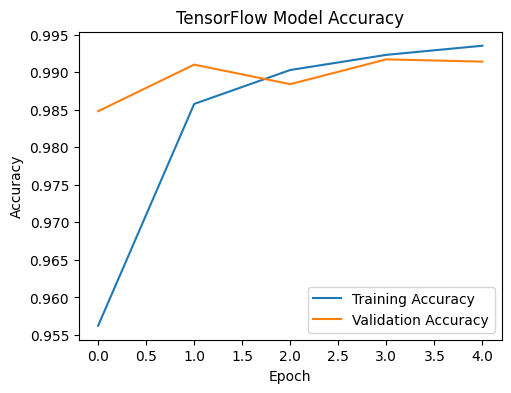

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_tf.history['accuracy'], label='Training Accuracy')
plt.plot(history_tf.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('TensorFlow Model Accuracy')
plt.legend()

- 학습 과정 시각화(손실)

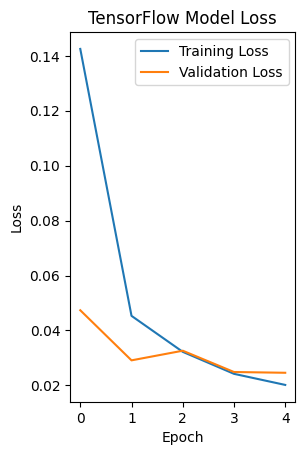

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history_tf.history['loss'], label='Training Loss')
plt.plot(history_tf.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('TensorFlow Model Loss')
plt.legend()
plt.show()

## **1.6 예측**

In [14]:
predictions = model_tf.predict(test_images[:5])
predicted_classes = np.argmax(predictions, axis=1)
print(f"\n예측: {predicted_classes}")
print(f"실제: {test_labels[:5]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

예측: [7 2 1 0 4]
실제: [7 2 1 0 4]


# **2. PyTorch 버전**

## **2.1 패키지 포함**

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [16]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.9.0+cu126


## **2.2 데이터셋 로드 및 전처리**

- ToTensor: 이미지를 PyTorch Tensor로 변환하고 픽셀 값을 0-1 범위로 정규화 (PIL Image -> Tensor)
- Normalize: 평균 0, 표준편차 1로 추가 정규화 (필수는 아니지만 모델 학습에 도움)

- 데이터 전처리를 위한 변환 정의

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # MNIST 데이터셋의 평균과 표준편차
])

- MNIST 데이터셋 로드

In [18]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.36MB/s]


- DataLoader를 사용하여 데이터 배치 단위로 로드

In [19]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

- 데이터셋 형태 확인 (배치, 채널, 높이, 너비)

In [20]:
sample_images, sample_labels = next(iter(train_loader))
print(f"학습 이미지 배치 형태: {sample_images.shape}, 학습 레이블 배치 형태: {sample_labels.shape}") # (Batch, Channel, Height, Width)

학습 이미지 배치 형태: torch.Size([64, 1, 28, 28]), 학습 레이블 배치 형태: torch.Size([64])


## **2.3 CNN 모델 구축**

- PyTorch nn.Module 사용

In [21]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 컨볼루션 계층 1: 입력 채널 1 (흑백), 출력 채널 32, 필터 3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        # 컨볼루션 계층 2: 입력 채널 32, 출력 채널 64, 필터 3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)

        # 맥스 풀링 계층
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 완전 연결 계층 (컨볼루션/풀링 후 Flatten된 특징 맵 크기에 따라 입력 차원 결정 필요)
        # MNIST 28x28 이미지 기준으로 계산:
        # conv1: (28-3+1) = 26x26
        # pool1: 26/2 = 13x13
        # conv2: (13-3+1) = 11x11
        # pool2: 11/2 = 5x5 (내림) -> 64 채널 * 5 * 5 = 1600
        self.fc1 = nn.Linear(in_features=64 * 5 * 5, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10) # 출력 클래스 10개 (0-9)

    def forward(self, x):
        # conv1 -> ReLU -> pool1
        x = self.pool(F.relu(self.conv1(x)))
        # conv2 -> ReLU -> pool2
        x = self.pool(F.relu(self.conv2(x)))

        # 특징 맵 평탄화 (배치 차원을 제외하고 1차원으로)
        x = x.view(-1, 64 * 5 * 5)

        # fc1 -> ReLU
        x = F.relu(self.fc1(x))
        # fc2 (출력)
        x = self.fc2(x)
        return x

- 모델 인스턴스 생성

In [22]:
model_pt = SimpleCNN()

- GPU 사용 가능 시 GPU로 모델 이동

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_pt.to(device)

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

- 모델 구조 요약 (torchsummary 사용 시 더 자세히 볼 수 있지만, 여기서는 간단히

In [24]:
print("\n--- PyTorch CNN 모델 구조 ---")
print(model_pt)


--- PyTorch CNN 모델 구조 ---
SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## **2.4모델 컴파일 및 학습**

- 손실 함수 (Loss Function): 다중 클래스 분류에는 CrossEntropyLoss 사용

In [25]:
criterion = nn.CrossEntropyLoss()

- 최적화 함수 (Optimizer): Adam 사용

In [26]:
optimizer = optim.Adam(model_pt.parameters(), lr=0.001)

- 학습 함수

In [27]:
def train_model(model, device, train_loader, optimizer, epoch):
    model.train() # 모델을 학습 모드로 설정
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # 데이터를 해당 디바이스로 이동

        optimizer.zero_grad() # 이전 그래디언트 초기화
        output = model(data)  # 순전파
        loss = criterion(output, target) # 손실 계산
        loss.backward()       # 역전파
        optimizer.step()      # 가중치 업데이트

        running_loss += loss.item()
        if batch_idx % 100 == 0: # 100 배치마다 로그 출력
            print(f'Epoch: {epoch}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.6f}')
    return running_loss / len(train_loader)

- 평가 함수

In [28]:
def test_model(model, device, test_loader):
    model.eval() # 모델을 평가 모드로 설정 (dropout, batchnorm 비활성화)
    test_loss = 0
    correct = 0
    with torch.no_grad(): # 그래디언트 계산 비활성화 (메모리 절약, 속도 향상)
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() # 배치당 손실 누적
            pred = output.argmax(dim=1, keepdim=True) # 가장 높은 확률을 가진 클래스 예측
            correct += pred.eq(target.view_as(pred)).sum().item() # 맞춘 개수 카운트

    test_loss /= len(test_loader.dataset) # 평균 손실
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')
    return test_loss, accuracy

- 학습 시작

In [29]:
epochs_pt = 5
train_losses_pt = []
test_losses_pt = []
test_accuracies_pt = []

In [30]:
print("\n--- PyTorch CNN 모델 학습 시작 ---")
for epoch in range(1, epochs_pt + 1):
    train_loss = train_model(model_pt, device, train_loader, optimizer, epoch)
    train_losses_pt.append(train_loss)
    test_loss, test_accuracy = test_model(model_pt, device, test_loader)
    test_losses_pt.append(test_loss)
    test_accuracies_pt.append(test_accuracy)
print("--- PyTorch CNN 모델 학습 완료 ---")


--- PyTorch CNN 모델 학습 시작 ---
Epoch: 1, Batch: 0/938, Loss: 2.294158
Epoch: 1, Batch: 100/938, Loss: 0.168261
Epoch: 1, Batch: 200/938, Loss: 0.072816
Epoch: 1, Batch: 300/938, Loss: 0.069139
Epoch: 1, Batch: 400/938, Loss: 0.147015
Epoch: 1, Batch: 500/938, Loss: 0.080724
Epoch: 1, Batch: 600/938, Loss: 0.016350
Epoch: 1, Batch: 700/938, Loss: 0.009073
Epoch: 1, Batch: 800/938, Loss: 0.008326
Epoch: 1, Batch: 900/938, Loss: 0.200246

Test set: Average loss: 0.0000, Accuracy: 9884/10000 (98.84%)

Epoch: 2, Batch: 0/938, Loss: 0.005709
Epoch: 2, Batch: 100/938, Loss: 0.027437
Epoch: 2, Batch: 200/938, Loss: 0.009685
Epoch: 2, Batch: 300/938, Loss: 0.013498
Epoch: 2, Batch: 400/938, Loss: 0.023217
Epoch: 2, Batch: 500/938, Loss: 0.022823
Epoch: 2, Batch: 600/938, Loss: 0.031208
Epoch: 2, Batch: 700/938, Loss: 0.005513
Epoch: 2, Batch: 800/938, Loss: 0.025427
Epoch: 2, Batch: 900/938, Loss: 0.045836

Test set: Average loss: 0.0000, Accuracy: 9893/10000 (98.93%)

Epoch: 3, Batch: 0/938, Lo

## **2.5 모델 평가 및 결과 시각화**

- 학습 과정 시각화(정확도)

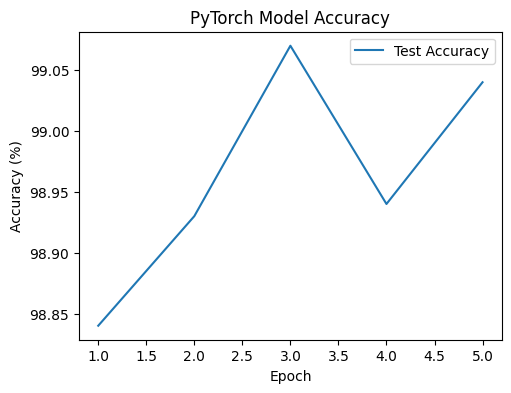

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs_pt + 1), test_accuracies_pt, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('PyTorch Model Accuracy')
plt.legend()

- 학습 과정 시각화(손실)

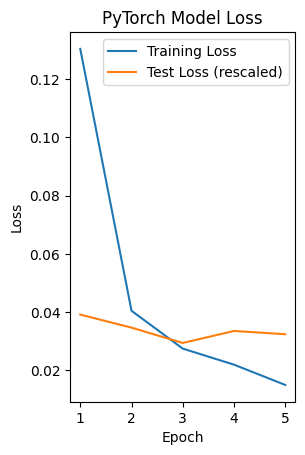

In [32]:
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs_pt + 1), train_losses_pt, label='Training Loss')
plt.plot(range(1, epochs_pt + 1), [l * test_loader.batch_size for l in test_losses_pt], label='Test Loss (rescaled)') # 테스트 로스 스케일 맞춰서
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('PyTorch Model Loss')
plt.legend()
plt.show()

## **2.6 예측**

In [33]:
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
output = model_pt(data)
pred = output.argmax(dim=1, keepdim=True)
print(f"예측: {pred.flatten()[:5].tolist()}")
print(f"실제: {target[:5].tolist()}")

예측: [7, 2, 1, 0, 4]
실제: [7, 2, 1, 0, 4]
